https://blog.gopenai.com/unleashing-the-power-of-linear-regression-in-python-an-in-depth-guide-with-practical-coding-ac012326086f

In [23]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the Boston housing dataset
#boston = datasets.load_boston()
# Define predictors and response
import pandas as pd
import numpy as np
boston = pd.read_csv("BostonHousing.csv")
y = boston['crim'].to_numpy().reshape(len(boston),1)
X = boston.drop("crim",axis=1).to_numpy().reshape(len(boston),-1)
X = X[:,[6]]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42)
# Fit the linear regression model
model = LinearRegression().fit(X_train, y_train)
# Print the coefficient and intercept
print('Coefficient:', model.coef_)
print('Intercept:', model.intercept_)
print(X.shape)
print(y.shape)

Coefficient: [[-1.52615998]]
Intercept: [9.42103951]
(506, 1)
(506, 1)


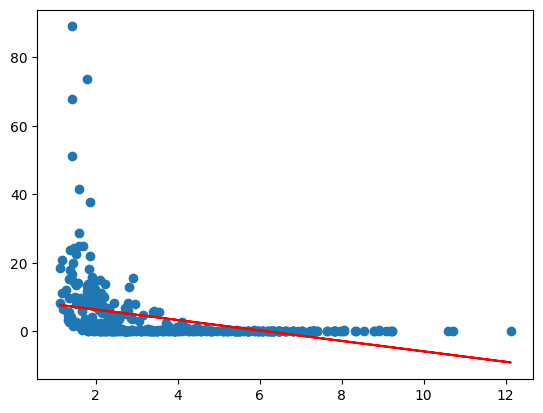

In [24]:
import matplotlib.pyplot as plt

# Plot the data and the model prediction
plt.scatter(X_train, y_train)
plt.plot(X_train, model.predict(X_train), color='red')
plt.show()

In [26]:
# Define predictors and response
#X = boston.data[:, [5, 12]] # RM and LSTAT
#y = boston.target # house prices
boston = pd.read_csv("BostonHousing.csv")
y = boston['crim'].to_numpy().reshape(len(boston),1)
X = boston.drop("crim",axis=1).to_numpy().reshape(len(boston),-1)
X = X[:,[5,6]]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
random_state=42)
# Fit the multiple linear regression model
model = LinearRegression().fit(X_train, y_train)
# Print the coefficients and intercept
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficients: [[ 0.04212173 -1.10754396]]
Intercept: [4.93915224]


# Question Review

1. Define simple linear regression and its key elements. How is it different from multiple linear regression?

We normally learn about linear regression with the following expression, where a is the intercept and b is the slope.

$$
y =a +b \cdot x
$$

Multiple regression can be described with the following expression.

$$
y =a +b_1 \cdot x_1 +b_2 \cdot x_2 + \ldots + b_n \cdot x_n
$$


2. Discuss the assumptions underlying a linear regression model. How can these assumptions be checked using Python?

Linear regression has several assumptions that must be met for the analysis to be valid. These assumptions include:
1. Linearity: The relationship between the dependent and independent variables is linear.
Independence: The observations are independent of each other.
2. Homoscedasticity: The variance of the errors is constant across all levels of the independent variables.
3. Normality: The errors follow a normal distribution.
4. No multicollinearity: The independent variables are not highly correlated with each other.


4. Explain how to interpret the coefficients and intercept of a linear regression model in Python.
FROM: Reddit

In an OLS regression model, coefficients are interpreted as "expected change in the outcome, following one unit of change in the predictor, with all other variables held constant". "Held constant" is a bit vague, so you can imagine it like this: If you have two people, who are equal on all other variables, but they are one unit apart on the variable of interest, the coefficient represents the expected difference between these two people.
  
    When you have interaction terms in the model, things get a bit trickier, because the interpretation of the first order terms also changes from main effects to conditional simple effects, conditional on the other term in the interaction being zero. This sounds difficult, so let's break it down:
  
    Consider a regression model of the form:
  
    ŷ = b0 + b1(Gender) + b2(age) + b3(age*Gender)
  
    In this model, the coefficient for Gender represents the difference between the two genders WHEN AGE IS ZERO and the coefficient for age represents the increase/decrease in y following a unit of change in age WHEN GENDER IS ZERO (for whichever category is coded zero, usually males). Of course, age can never reasonably be zero in a study, so the coefficient for Gender will be meaningless. This is why people sometimes mean center such variables prior to their inclusion in the regression model: in that case, the other conditional simple effects will become conditional on the mean (which is always meaningful) and not zero, which may be outside the range of the variable completely.
  
    The interpretation of the interaction coefficient itself is pretty straightforward. Again, let's say the actual values in the above model are as follows:
  
    b1 = 0.3b2 = 0.44b3 = 0.089
  
    The interaction coefficient can be interpreted in two ways: It is either the difference in slope of age between the two genders (so that if 0 is male, 1 is female, when you go from male to female, the slope of age increases by 0.089) or the increase in the estimated mean difference between the two genders for each unit of increase in age. So if you increase age by one unit, the difference between males and females increases by 0.089. An interaction term always quantifies the difference in differences/effects.
  
    My advice is not to rely exclusively on coefficients when interpreting a model with an interaction. Instead, try to probe the interaction, using either simple slopes analysis (when you quantify the effect of one first order term at pre-selected values of the covariate) or floodlight analysis (Johnson-Neyman intervals) which is also available in select softwares.

5. Describe how to visualize a linear regression model and its residuals using Python’s `matplotlib` library.

In [ ]:
# Alternative library with good residual support: https://www.statology.org/residual-plot-python/
# Checkout CCPR plot
# Predicting values using approach from 
# https://lifewithdata.com/2023/06/05/how-to-create-a-residual-plot-in-python/
y_pred = model.predict(X_test)

# Calculating residuals
residuals = y_test - y_pred

import matplotlib.pyplot as plt

# Scatter plot
plt.scatter(y_pred, residuals, alpha=0.5)

# Title and labels
plt.title('Residual Plot')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')

# Show the plot
plt.show()


6. Demonstrate how to fit a multiple linear regression model in Python.
Basically, just like shown in the second example shown above. Specify the formula as y ~ A+B, which are factors


7. Discuss common issues in linear regression such as multicollinearity and heteroscedasticity, and ways to address them using Python.

A key goal of regression analysis is to isolate the relationship between each independent variable and the dependent variable. The interpretation of a regression coefficient is that it represents the mean change in the dependent variable for each 1 unit change in an independent variable when you hold all of the other independent variables constant. That last portion is crucial for our discussion about multicollinearity.  

The idea is that you can change the value of one independent variable and not the others. However, when independent variables are correlated, it indicates that changes in one variable are associated with shifts in another variable. The stronger the correlation, the more difficult it is to change one variable without changing another. It becomes difficult for the model to estimate the relationship between each independent variable and the dependent variable independently because the independent variables tend to change in unison.

There are two basic kinds of multicollinearity:

Structural multicollinearity: This type occurs when we create a model term using other terms. In other words, it’s a byproduct of the model that we specify rather than being present in the data itself. For example, if you square term X to model curvature, clearly there is a correlation between X and X2.

Data multicollinearity: This type of multicollinearity is present in the data itself rather than being an artifact of our model. Observational experiments are more likely to exhibit this kind of multicollinearity.

Multicollinearity causes the following two basic types of problems:

The coefficient estimates can swing wildly based on which other independent variables are in the model. The coefficients become very sensitive to small changes in the model.
Multicollinearity reduces the precision of the estimated coefficients, which weakens the statistical power of your regression model. You might not be able to trust the p-values to identify independent variables that are statistically significant.

The need to reduce multicollinearity depends on its severity and your primary goal for your regression model. Keep the following three points in mind:

The severity of the problems increases with the degree of the multicollinearity. Therefore, if you have only moderate multicollinearity, you may not need to resolve it.

Multicollinearity affects only the specific independent variables that are correlated. Therefore, if multicollinearity is not present for the independent variables that you are particularly interested in, you may not need to resolve it. Suppose your model contains the experimental variables of interest and some control variables. If high multicollinearity exists for the control variables but not the experimental variables, then you can interpret the experimental variables without problems.

Multicollinearity affects the coefficients and p-values, but it does not influence the predictions, precision of the predictions, and the goodness-of-fit statistics. If your primary goal is to make predictions, and you don’t need to understand the role of each independent variable, you don’t need to reduce severe multicollinearity.


Over the years, I’ve found that many people are incredulous over the third point, so here’s a reference!


The fact that some or all predictor variables are correlated among themselves does not, in general, inhibit our ability to obtain a good fit nor does it tend to affect inferences about mean responses or predictions of new observations.  —Applied Linear Statistical Models, p289, 4th Edition.

If you’re performing a designed experiment, it is likely orthogonal, meaning it has zero multicollinearity. Learn more about orthogonality.

The potential solutions include the following:

Remove some of the highly correlated independent variables.
Linearly combine the independent variables, such as adding them together.
Partial least squares regression uses principal component analysis to create a set of uncorrelated components to include in the model.
LASSO and Ridge regression are advanced forms of regression analysis that can handle multicollinearity. If you know how to perform linear least squares regression, you’ll be able to handle these analyses with just a little additional study.
As you consider a solution, remember that all of these have downsides. If you can accept less precise coefficients, or a regression model with a high R-squared but hardly any statistically significant variables, then not doing anything about the multicollinearity might be the best solution.

In this post, I use VIFs to check for multicollinearity. For a more in-depth look at this measure, read my post about Calculating and Assessing Variance Inflation Factors (VIFs).


8. Demonstrate how to conduct residual analysis and validate the assumptions of linear regression using Python.

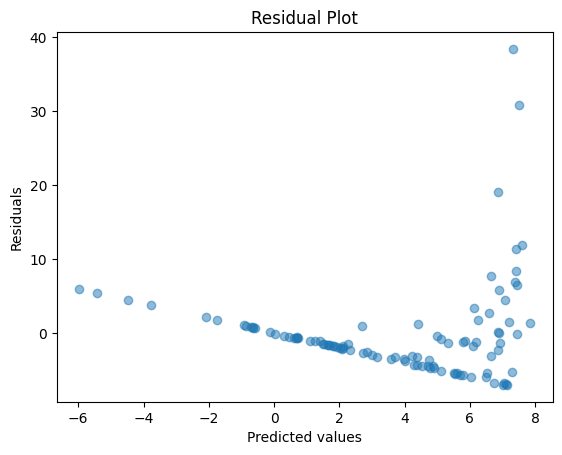

In [35]:
# Alternative library with good residual support: https://www.statology.org/residual-plot-python/
# Checkout CCPR plot
# Predicting values using approach from 
# https://lifewithdata.com/2023/06/05/how-to-create-a-residual-plot-in-python/
y_pred = model.predict(X_test)

# Calculating residuals
residuals = y_test - y_pred

import matplotlib.pyplot as plt

# Scatter plot
plt.scatter(y_pred, residuals, alpha=0.5)

# Title and labels
plt.title('Residual Plot')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')

# Show the plot
plt.show()

9. Discuss the handling of categorical predictors in linear regression models using Python.
10. Explain how interaction effects between predictors can be modeled in a multiple linear regression model in Python.

These two problems are nicely discussed in this article. I worked through the example in the PowerQueryBitsAndPieces repo.

https://links.theanalysisfactor.com/c/s/5SF/sxj2W/6/5nD/NRu/6XwX53/spJg26YIFX/P/P/1f

11. Discuss how to measure the goodness-of-fit of a linear regression model in Python.

R2 or the coefficient of determination is the most commonly used goodness-of-fit parameter. You cannot use R2 to determine if the coefficients and predictions are biased, so you need to examine the residual plot to ensure that the assumptions are met. A biased model consistently over- or under-predictes the data. Patterns in the residuals indicates bias.

Let's compute the R2 for the model in this sheet.

In [34]:
from sklearn.metrics import r2_score
# r2_score(y_true, y_pred)
# Here is the calculation on the training set
print(f'R\N{SUPERSCRIPT TWO} on the training set is {r2_score(y_train,model.predict(X_train))}')
# The calculation on the test set is probably more interesting because it was not used to create the model.
print(f'R\N{SUPERSCRIPT TWO} on the test set is {r2_score(y_test,model.predict(X_test))}')

R² on the training set is 0.6501592679428922
R² on the test set is 0.5739577415025859


13. Demonstrate the process of diagnosing and checking assumptions for linear regression models in Python.

The statsmodel library has a good utility for printing our residual information and residual normality. Homeoskedaskity can be test using a special test (https://sscc.wisc.edu/sscc/pubs/RegDiag-R/homoscedasticity.html). A simple pairwise correlation test can help us find highly correlated factors (multicollinearity).